In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import collections
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

1) Dataset 1

In [2]:
dataset = [['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],
           ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'], 
           ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'], 
           ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'], 
           ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']]

Counter({'Skirt': 4, 'Scarf': 4, 'Pants': 4, 'Hat': 4, 'Sneakers': 2, 'Dress': 2, 'Heels': 2, 'Earrings': 2, 'Sunglasses': 1, 'Sandals': 1, 'Necklace': 1, 'Shirt': 1})


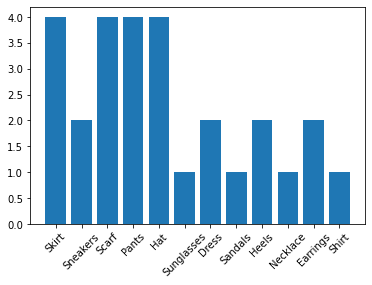

In [3]:
all_data = []
customers = []

for i, data in enumerate(dataset):
    all_data += data
    for j in range(len(data)):
        customers.append(i+1)
        
freq = collections.Counter(all_data)
print(freq)

plt.bar(range(len(freq)), list(freq.values()), align='center')
plt.xticks(range(len(freq)), list(freq.keys()), rotation=45)
plt.show()

- One-hot-encoding

In [4]:
encoder = TransactionEncoder()
encoder_ary = encoder.fit(dataset).transform(dataset)    
df = pd.DataFrame(encoder_ary, columns=encoder.columns_)  
df

,Dress,Earrings,Hat,Heels,Necklace,Pants,Sandals,Scarf,Shirt,Skirt,Sneakers,Sunglasses
0,False,False,True,False,False,True,False,True,False,True,True,False
1,False,False,True,False,False,True,False,False,False,True,True,True
2,True,False,False,True,False,True,True,True,False,False,False,False
3,True,True,True,True,True,False,False,True,False,False,False,False
4,False,True,False,False,False,True,False,True,True,True,False,False


- A priori with support metric

In [26]:
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True) 
frequent_itemsets

,support,itemsets
0,0.6,(Hat)
1,0.8,(Pants)
2,0.8,(Scarf)
3,0.6,(Skirt)
4,0.6,"(Pants, Scarf)"
5,0.6,"(Skirt, Pants)"


- Confidence metric

In [6]:
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Pants),(Scarf),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
1,(Scarf),(Pants),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
2,(Skirt),(Pants),0.6,0.8,0.6,1.00,1.2500,0.12,inf
3,(Pants),(Skirt),0.8,0.6,0.6,0.75,1.2500,0.12,1.6


- Lift metric

In [25]:
association_rules(frequent_itemsets, metric="lift", min_threshold=1.25)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


2) Dataset 2

In [8]:
dataset2 = pd.read_csv('Market_Basket_Optimisation.csv', header=None)

In [9]:
dataset2.head(8)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,whole wheat pasta,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,soup,light cream,shallot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Preprocessing

In [10]:
dataset2.fillna(0,inplace=True)

In [11]:
transactions = []
for i in range(len(dataset2)):
    transactions.append([str(dataset2.values[i,j]) for j in range(0,20) if str(dataset2.values[i,j])!='0'])

In [12]:
for i in range(5):
    print(transactions[i])

['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes', 'whole weat flour', 'yams', 'cottage cheese', 'energy drink', 'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad', 'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie', 'spinach', 'olive oil']
['burgers', 'meatballs', 'eggs']
['chutney']
['turkey', 'avocado']
['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea']


- Visualization 

Counter({'Skirt': 4, 'Scarf': 4, 'Pants': 4, 'Hat': 4, 'Sneakers': 2, 'Dress': 2, 'Heels': 2, 'Earrings': 2, 'Sunglasses': 1, 'Sandals': 1, 'Necklace': 1, 'Shirt': 1})


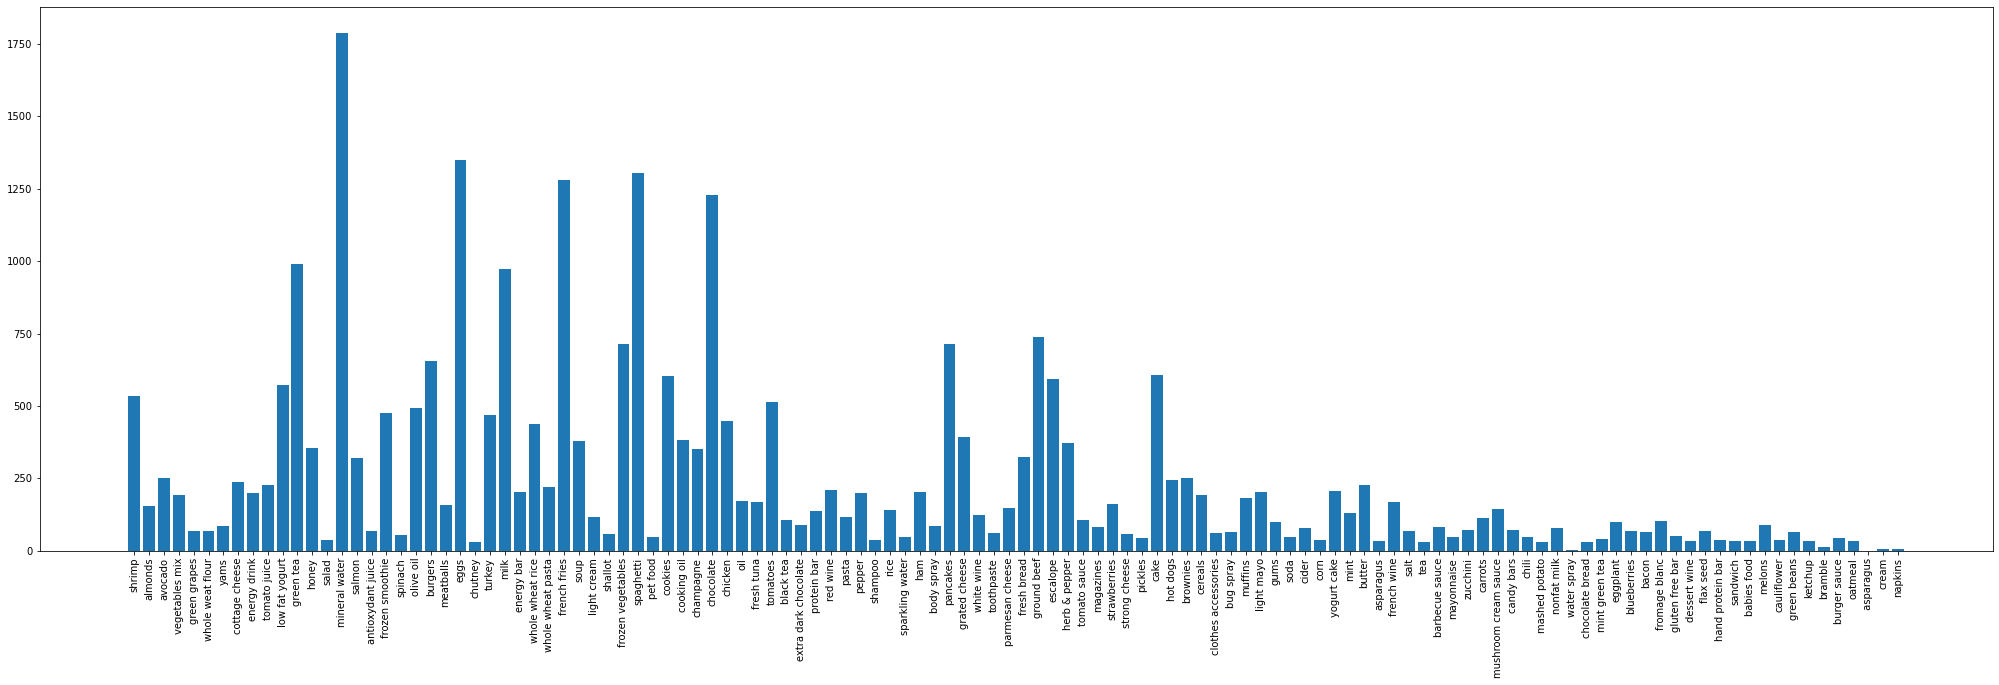

In [13]:
all_data2 = []
customers2 = []

for i, data in enumerate(transactions):
    all_data2 += data
    for j in range(len(data)):
        customers2.append(i+1)
        
freq2 = collections.Counter(all_data2)
print(freq)

plt.figure(figsize=(35, 10))
plt.bar(range(len(freq2)), list(freq2.values()), align='center')
plt.xticks(range(len(freq2)), list(freq2.keys()), rotation=90)
plt.show()

- One-hot-encoding

In [15]:
encoder = TransactionEncoder()
encoder_ary = encoder.fit(transactions).transform(transactions)    
df2 = pd.DataFrame(encoder_ary, columns=encoder.columns_)  
df2

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


- A priori algorithm

In [27]:
frequent_itemsets2 = apriori(df2, min_support=0.1, use_colnames=True) 
frequent_itemsets2

,support,itemsets
0,0.163845,(chocolate)
1,0.179709,(eggs)
2,0.170911,(french fries)
3,0.132116,(green tea)
4,0.129583,(milk)
5,0.238368,(mineral water)
6,0.174110,(spaghetti)
